
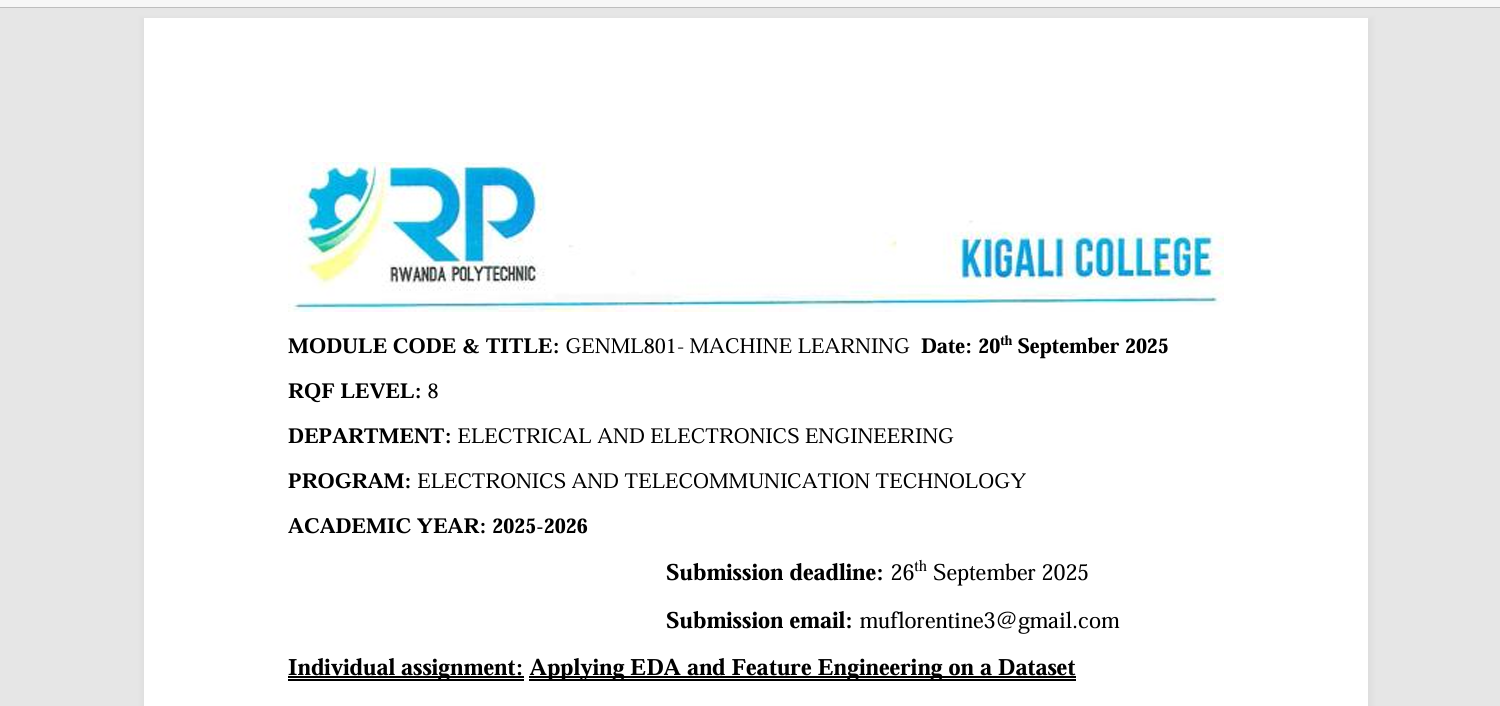




## NAME: NSHIMIYIMANA Christian
## Reg number: 25RP20576"

## 1. importing library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle# for saving/loading model
import warnings
warnings.filterwarnings("ignore")


## 2. Choose a Dataset 

 ## Loading dataset from kaggle.com

In [2]:
#  Load dataset
Park_dataset = pd.read_csv('parking_dataset...csv')


In [3]:
Park_dataset

,Day,Hour,Weather,Weekend,NearbyEvent,OccupiedLastHour,Free_Slot
0,Sunday,21,Cloudy,1,0,0,0
1,Saturday,21,Sunny,1,0,0,0
2,Sunday,9,Sunny,1,0,1,0
3,Tuesday,21,Cloudy,0,0,0,1
4,Sunday,12,Cloudy,1,1,1,1
...,...,...,...,...,...,...,...
495,Thursday,12,Cloudy,0,1,1,1
496,Monday,12,Rainy,0,0,0,0
497,Saturday,15,Cloudy,1,0,0,0
498,Monday,17,Sunny,0,0,1,1


In [4]:
Park_dataset.columns

Index(['Day', 'Hour', 'Weather', 'Weekend', 'NearbyEvent', 'OccupiedLastHour',
       'Free_Slot'],
      dtype='object')

In [5]:
# number of rows and Columns in this dataset
Park_dataset.shape

(500, 7)

## 3. getting the statistical measures of the data

In [6]:
# getting the statistical measures of the data
Park_dataset.describe()

,Hour,Weekend,NearbyEvent,OccupiedLastHour,Free_Slot
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.684000,0.326000,0.282000,0.500000,0.360000
std,5.013423,0.469217,0.450424,0.500501,0.480481
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.500000,0.000000
75%,18.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
Park_dataset['Free_Slot'].value_counts()

Free_Slot
0    320
1    180
Name: count, dtype: int64

In [18]:
le_day = LabelEncoder()
Park_dataset["Day"] = le_day.fit_transform(Park_dataset["Day"])

le_weather = LabelEncoder()
Park_dataset["Weather"] = le_weather.fit_transform(Park_dataset["Weather"])

# -----------------------------
# 3️⃣ Define features and target
# -----------------------------
X = Park_dataset.drop("Free_Slot", axis=1)  # Replace 'Occupied' with your target column
y = Park_dataset["Free_Slot"]


## 4. Apply Exploratory Data Analysis (EDA)

## 4.1 Univariate Analysis: Histogram of parking prediction by Hour

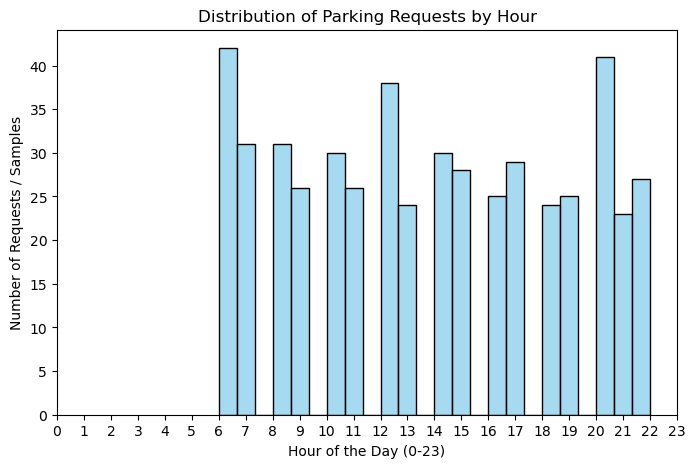

In [19]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(Park_dataset['Hour'], bins=24, kde=False, color='skyblue')
plt.title("Distribution of Parking Requests by Hour")
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Number of Requests / Samples")
plt.xticks(range(0,24))
plt.show()

## 4.2 Univariate Analysis: Histogram of parking prediction by weekend

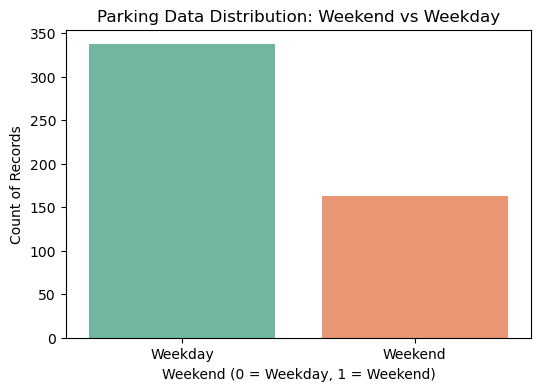

In [9]:
# Plot histogram for Weekend
plt.figure(figsize=(6,4))
sns.countplot(x="Weekend", data= Park_dataset, palette="Set2")

plt.title("Parking Data Distribution: Weekend vs Weekday")
plt.xlabel("Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count of Records")
plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.show()

## 4.3 Univariate Analysis: Histogram of parking prediction by Days of week

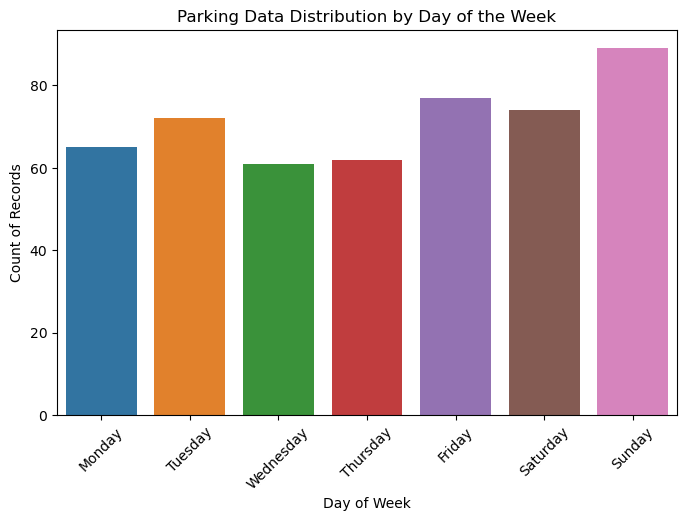

In [10]:
# Define order of days and color palette
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
colors = sns.color_palette("tab10", len(days_order))  # unique colors for each day

# Plot histogram for Day of the week
plt.figure(figsize=(8,5))
sns.countplot(x="Day", data=Park_dataset, order=days_order, palette=colors)
plt.title("Parking Data Distribution by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Count of Records")
plt.xticks(rotation=45)
plt.show()

## 4.4 Bivariate Analysis: Barchat of weather vs free parking slots

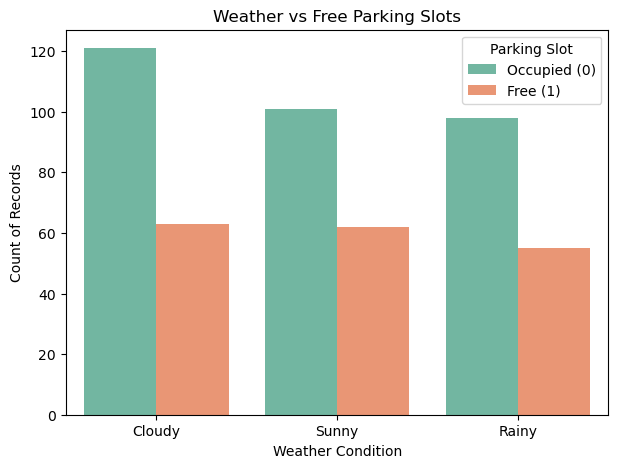

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x="Weather", hue="Free_Slot", data=Park_dataset, palette="Set2")

plt.title("Weather vs Free Parking Slots")
plt.xlabel("Weather Condition")
plt.ylabel("Count of Records")
plt.legend(title="Parking Slot", labels=["Occupied (0)", "Free (1)"])
plt.show()

## 4.5 Bivariate Analysis: Barchat of Days of the week vs free parking slots

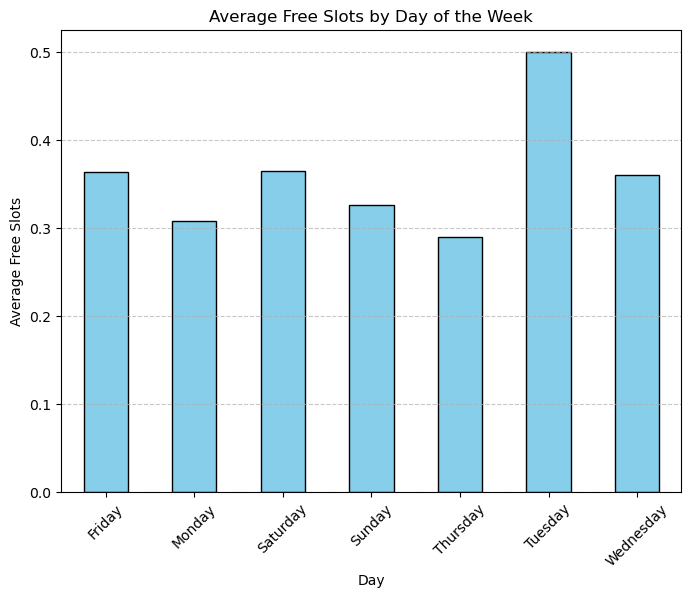

In [11]:
# Bar chart: Days of the Week vs Free Slots
plt.figure(figsize=(8, 6))
Park_dataset.groupby('Day')['Free_Slot'].mean().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Free Slots by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Free Slots')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4.6 Bivariate Analysis: Barchat of Days of the weather vs free parking slots

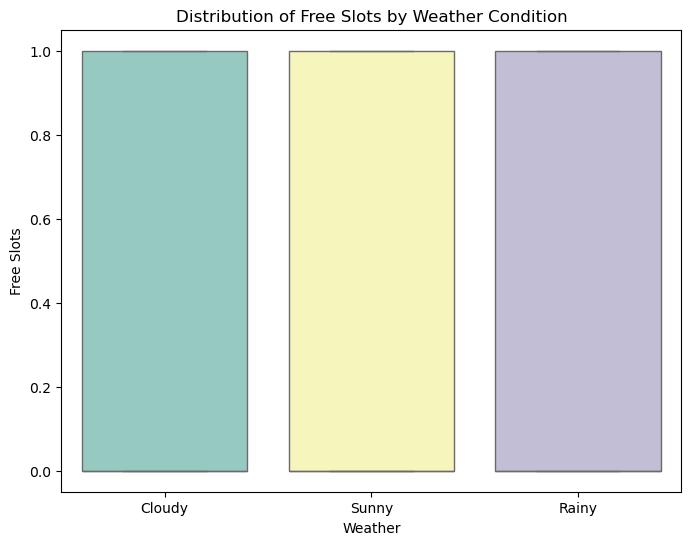

In [17]:

plt.figure(figsize=(8, 6))
sns.boxplot(x="Weather", y="Free_Slot", data=Park_dataset, palette="Set3")
plt.title("Distribution of Free Slots by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Free Slots")
plt.show()

## 4.7 Bivariate Analysis: Barchat of Days vs free parking slots

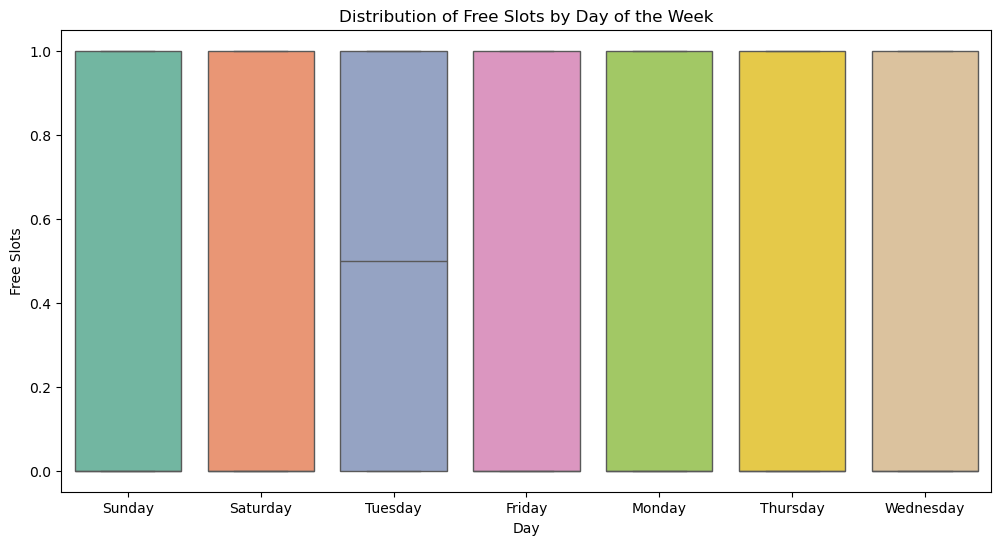

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Day", y="Free_Slot", data=Park_dataset, palette="Set2")
plt.title("Distribution of Free Slots by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Free Slots")
plt.show()


## 5. Apply correlation headmap to evaluate relationships

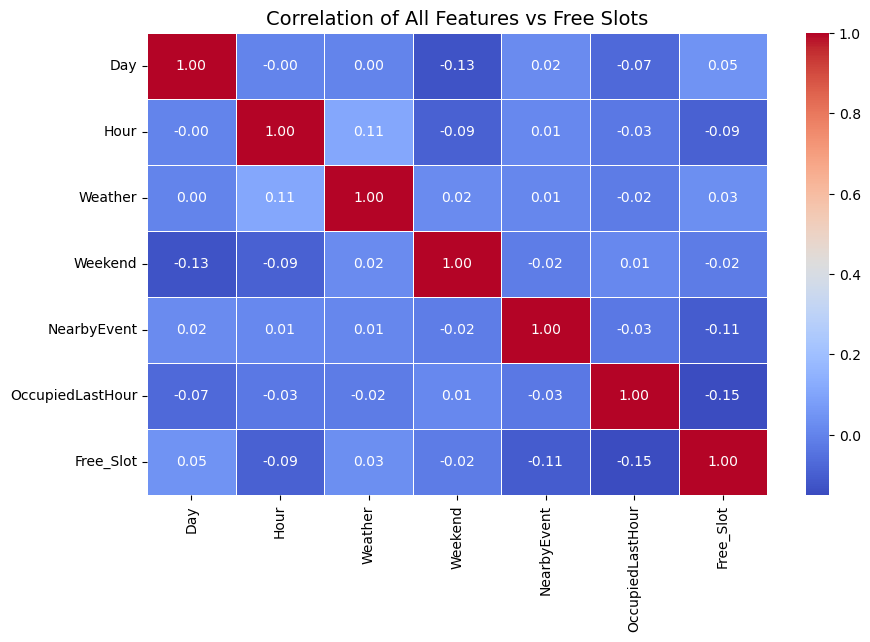

In [44]:


# Compute correlation matrix
corr = Park_dataset.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of All Features vs Free Slots", fontsize=14)
plt.show()


## 6. Explore missing values, outliers, and data anomalies. 

In [22]:
# Check how many missing values in each column
print(Park_dataset.isnull().sum())


Day                 0
Hour                0
Weather             0
Weekend             0
NearbyEvent         0
OccupiedLastHour    0
Free_Slot           0
dtype: int64


## 7. Apply Feature Engineering Techniques

## 7.1 Handle missing values:" we have no missed value in our dataset"

## 8. Perform data transformation: 
## Encoding categorical data 

In [24]:
le_day = LabelEncoder()
Park_dataset["Day"] = le_day.fit_transform(Park_dataset["Day"])

le_weather = LabelEncoder()
Park_dataset["Weather"] = le_weather.fit_transform(Park_dataset["Weather"])

# -----------------------------
# 3️⃣ Define features and target
# -----------------------------
X = Park_dataset.drop("Free_Slot", axis=1)  # Replace 'Occupied' with your target column
y = Park_dataset["Free_Slot"]



## 9. Normalization and standardization:
not needed because we have small dataset

 separating features and labels

In [25]:
# separating features and labels
X = Park_dataset.drop(columns = 'Free_Slot', axis=1)
y = Park_dataset['Free_Slot']

10. Features

In [26]:
X

,Day,Hour,Weather,Weekend,NearbyEvent,OccupiedLastHour
0,3,21,0,1,0,0
1,2,21,2,1,0,0
2,3,9,2,1,0,1
3,5,21,0,0,0,0
4,3,12,0,1,1,1
...,...,...,...,...,...,...
495,4,12,0,0,1,1
496,1,12,1,0,0,0
497,2,15,0,1,0,0
498,1,17,2,0,0,1


## 10. Build and Deploy a Machine Learning Model 

## 10. 1 Choose a suitable model:
I choose DecisionTreeClassifier

## Train and test my model

In [45]:

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
Park_dataset = pd.read_csv("parking_dataset...csv")  # Replace with your file

# -----------------------------
# 2️⃣ Encode categorical variables BEFORE splitting
# -----------------------------
le_day = LabelEncoder()
Park_dataset["Day"] = le_day.fit_transform(Park_dataset["Day"])

le_weather = LabelEncoder()
Park_dataset["Weather"] = le_weather.fit_transform(Park_dataset["Weather"])

# -----------------------------
# 3️⃣ Define features and target
# -----------------------------
X = Park_dataset[["Day", "Hour", "Weather", "Weekend", "NearbyEvent", "OccupiedLastHour"]]
y = Park_dataset["Free_Slot"]

# -----------------------------
# 4️⃣ Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5️⃣ Train Decision Tree model
# -----------------------------
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"✅ Model trained successfully! Test Accuracy: {accuracy:.2f}")


✅ Model trained successfully! Test Accuracy: 0.53


## 10.2 Model Evaluation
my model evaluated using accuracy, precision, recall, f1-score and support

In [46]:
# 6️⃣ Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy: {acc:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 53.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65        67
           1       0.29      0.30      0.30        33

    accuracy                           0.53       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.53      0.53      0.53       100



## 5.3 Apply Confusion matrix : to check how my model is perfoming

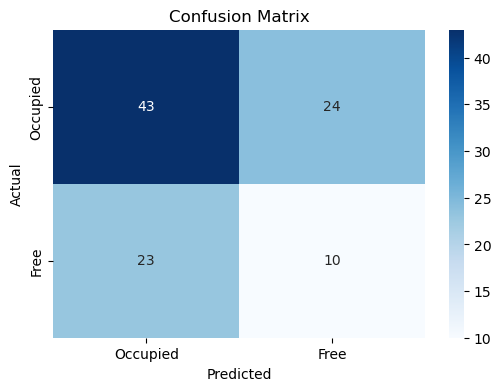

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Occupied", "Free"],
            yticklabels=["Occupied", "Free"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 10.3. Model saving and loading

In [48]:
# -----------------------------
# 6️⃣ Save model and encoders
# -----------------------------
with open("parking_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("le_day.pkl", "wb") as f:
    pickle.dump(le_day, f)

with open("le_weather.pkl", "wb") as f:
    pickle.dump(le_weather, f)

print("✅ Model and encoders saved successfully!")

# -----------------------------
# 7️⃣ Load model and encoders (later / for prediction)
# -----------------------------
with open("parking_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("le_day.pkl", "rb") as f:
    loaded_le_day = pickle.load(f)

with open("le_weather.pkl", "rb") as f:
    loaded_le_weather = pickle.load(f)
    print("✅ Model and encoders loaded successfully!")

# -----------------------------
# 8️⃣ Make a sample prediction
# -----------------------------
# Example input
day_input = "Monday"
hour_input = 22
weather_input = "Sunny"
weekend_input = 1
event_input = 1
occupied_last_hour_input = 0

# Encode input
day_encoded = loaded_le_day.transform([day_input])[0]
weather_encoded = loaded_le_weather.transform([weather_input])[0]

# Create DataFrame for prediction
sample = pd.DataFrame(
    [[day_encoded, hour_input, weather_encoded, weekend_input, event_input, occupied_last_hour_input]],
    columns=["Day", "Hour", "Weather", "Weekend", "NearbyEvent", "OccupiedLastHour"]
)

# Make prediction
prediction = loaded_model.predict(sample)[0]

print("\nWelcome to the Smart Parking Prediction System 🚗")
if prediction == 1:
    print("✅ You can enter, there is a free parking place.")
else:
    print("❌ Sorry, no parking place available right now.")



✅ Model and encoders saved successfully!
✅ Model and encoders loaded successfully!

Welcome to the Smart Parking Prediction System 🚗
❌ Sorry, no parking place available right now.
